Daniel Suaza Varela - 202311517

In [31]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, expand_complex,Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, asin,pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting
import sympy
# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

PUNTO 1

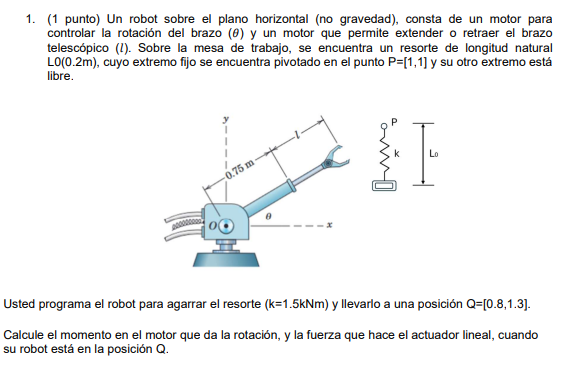

BONO DE ESTE ÍTEM
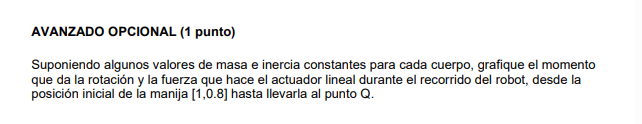

Punto 2

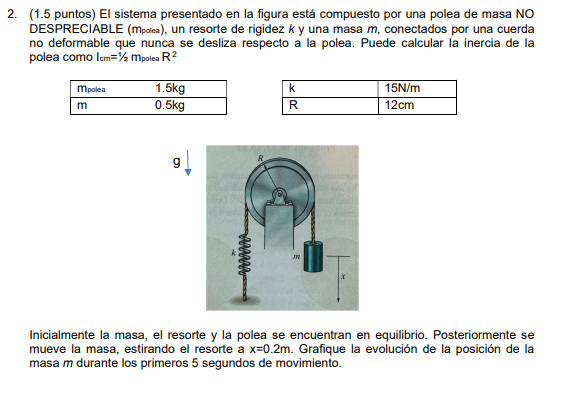

BONO DE ESE PUNTO 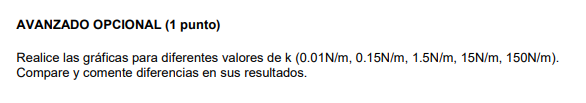

PUNTO 3

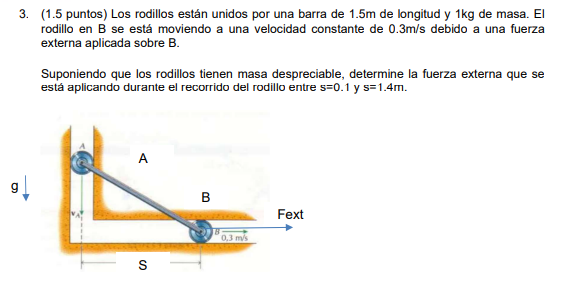

Fuerza externa simbólica F_ext(s):


-g*m*s(t)/(2*sqrt(L**2 - s(t)**2))

Fuerza de reacción normal en A:


g*m*s(t)/(2*sqrt(L**2 - s(t)**2))

Fuerza de reacción normal en B:


g*m

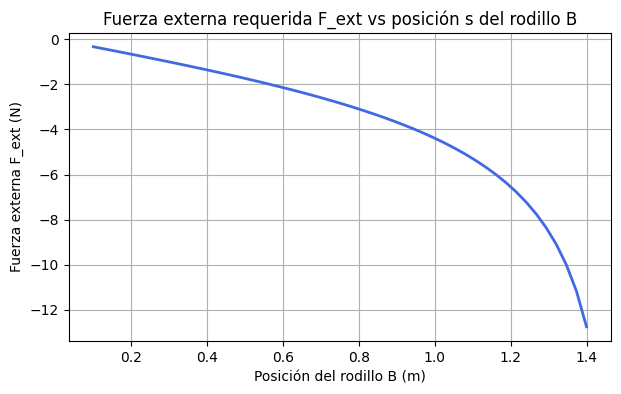

s = 0.10 m → F_ext = -0.328 N
s = 1.40 m → F_ext = -12.752 N


In [101]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols

# =======================
# 1. Definición de variables y marcos
# =======================
N = ReferenceFrame("N")
s = dynamicsymbols("s")        # desplazamiento horizontal del rodillo B
L, m, g = sp.symbols("L m g", positive=True, real=True)

# =======================
# 2. Cinemática geométrica
# =======================
# Relación geométrica: sin(theta) = s / L
theta = sp.asin(s / L)
A = N.orientnew("A", "Axis", (-sp.pi/2 + theta, N.z))  # marco del cuerpo (barra AB)

# Posición del centro de masa desde A (mitad de la barra)
r_G = (L/2) * A.x

# =======================
# 3. Fuerzas aplicadas
# =======================
# Fuerzas desconocidas y externas
N_A, N_B, F_ext = sp.symbols("N_A N_B F_ext")

# Suma de fuerzas (a_CM = 0, movimiento a velocidad constante)
sumF = N_A*N.x + N_B*N.y - m*g*N.y + F_ext*N.x

# =======================
# 4. Momentos respecto al centro de masa
# =======================
r_A = -r_G       # vector desde el CM hacia A
r_B = (L/2)*A.x  # vector desde el CM hacia B

# Momento total en el CM
sumM = r_A.cross(N_A*N.x) + r_B.cross(N_B*N.y) + r_B.cross(F_ext*N.x)

# =======================
# 5. Ecuaciones escalares (Newton-Euler)
# =======================
eqs = [
    sumF.dot(N.x),
    sumF.dot(N.y),
    sumM.dot(N.z)
]

# Resolver sistema simbólico
sol = sp.solve(eqs, [N_A, N_B, F_ext], dict=True)[0]

# Expresión simbólica de la fuerza externa
F_ext_expr = sp.simplify(sol[F_ext])
print("Fuerza externa simbólica F_ext(s):")
display(F_ext_expr)


#Expresión simbólica de las reacciones
print("Fuerza de reacción normal en A:")
N_A_expr = sp.simplify(sol[N_A]) 
display(N_A_expr)
print("Fuerza de reacción normal en B:")
display(sp.simplify(sol[N_B]))

# =======================
# 6. Sustitución de valores numéricos
# =======================
params = {L: 1.5, m: 1, g: 9.81}
s_vals = np.linspace(0.1, 1.4, 50)
F_vals = [float(F_ext_expr.subs(params | {s: val})) for val in s_vals]

# =======================
# 7. Gráfica F_ext vs s
# =======================
plt.figure(figsize=(7,4))
plt.plot(s_vals, F_vals, color='royalblue', linewidth=2)
plt.title("Fuerza externa requerida F_ext vs posición s del rodillo B")
plt.xlabel("Posición del rodillo B (m)")
plt.ylabel("Fuerza externa F_ext (N)")
plt.grid(True)
plt.show()

# =======================
# 8. Valores específicos
# =======================
for val in [0.1, 1.4]:
    print(f"s = {val:.2f} m → F_ext = {float(F_ext_expr.subs(params | {s: val})):0.3f} N")


BONO DE ESTE ÍTEM 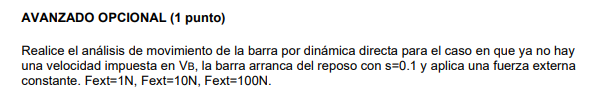

In [136]:
#En este caso, es simular la barra cayendo, a distintas fuerzas externas 
#Dado que s no está dado, como en el caso anterior, ahora será una incógnita en términos de theta
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols 
from scipy.integrate import solve_ivp


# ======================= # 1. Definición de variables y marcos # ======================= 
N = ReferenceFrame("N") 
theta = dynamicsymbols("theta") #ángulo de elevación de la barra
L, m, g, t = sp.symbols("L m g t") 

# ======================= # 2. Cinemática geométrica # ======================= 
A = N.orientnew("A", "Axis", (np.pi/2 - theta, N.z)) # marco del cuerpo (barra AB), el eje Y apunta hacia 
# Posición del centro de masa desde A (mitad de la barra) 
r_G = sp.Rational(1,2)*(L)* A.y
# Aceleración del centro de masa 
a_G = r_G.diff(t,N).diff(t,N)

# ======================= # 3. Fuerzas aplicadas # ======================= 
# Fuerzas desconocidas 
N_A, N_B = sp.symbols("N_A N_B") 
# Fuerza conocida 
F_ext = sp.symbols("F_ext") 
#Suma de fuerzas (sumF = m*a_cm) 
sumF = N_A*N.x + N_B*N.y - m*g*N.y + F_ext*N.x -m*a_G 

# ======================= # 4. Momentos respecto al centro de masa # ======================= 
r_A = r_G #vector desde CM hasta A
r_B = -r_G #vector desde CM hasta B
#Inercia y aceleración angular 
I_cm = (1/12)*m*(L)**2 #
alpha = theta.diff(t,t)
# Momento total en el CM 
sumM = r_A.cross(N_A*N.x) + r_B.cross(N_B*N.y) + r_B.cross(F_ext*N.x) + I_cm*(alpha)*N.z 

# ======================= # 5. Ecuaciones escalares (Newton-Euler) # ======================= 
eqs = [ sumF.dot(N.x), sumF.dot(N.y), sumM.dot(N.z) ] 
# Resolver sistema simbólico 
sol = sp.solve(eqs, [N_A, N_B, alpha], dict=True)[0] 
alpha_valor_diferencial = sol[alpha].simplify()

print("A continuación, la ecuación diferencial no lineal de primer orden que modela a alpha(segunda derivada de theta)")
display(alpha_valor_diferencial)

A continuación, la ecuación diferencial no lineal de primer orden que modela a alpha(segunda derivada de theta)


(-12.0*F_ext*cos(theta(t) - 1.5707963267949) - 6.0*L*m*sin(theta(t) - 1.5707963267949)*cos(theta(t) - 1.5707963267949)*Derivative(theta(t), t)**2 + 6.0*g*m*sin(theta(t) - 1.5707963267949))/(L*m*(2.09488880330592e-14*sin(2*theta(t)) + 3.0*cos(2*theta(t)) + 1.0))

In [137]:
ode = sp.Eq(theta.diff(t,t),alpha_valor_diferencial )

In [160]:
# =======================
# 5. Graficar trayectoria del centro de masa
# =======================

dicti = {1:[[], []], 10:[[], []], 100:[[],[]]}

for f_ex in dicti:
    ode_num = ode.subs({L: 1.5, m: 1, g: 9.81, F_ext:f_ex}) #F_ext: 1, 10, 100
    theta_ddot_func = sp.lambdify([t, theta, theta.diff(t)], ode_num.rhs, 'numpy')

    def dynamics(t, y):
        th, th_dot = y
        th_ddot = theta_ddot_func(t, th, th_dot)
        return [th_dot, th_ddot]

    # Intervalo de tiempo
    t_span = (0, 4)           #4 segundos
    t_eval = np.linspace(0, 4, 100)

    # Condiciones iniciales
    s0 = 0.1
    L_val = 1.5
    theta0_val = np.arccos(s0 / L_val)   # theta(0)
    thetadot0_val = 0                    # theta'(0)
    y0 = [theta0_val, thetadot0_val]

    # Resolver
    sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45')
    for i in range(len(sol.y[0])):
        cm = r_G
        cm_N = cm.express(N)
        cm_x = cm_N.dot(N.x).subs({L: 1.5, theta: sol.y[0][i]}).evalf() #le ponemos un - por cuestiones de que theta disminuye a medida que se mueve la barra en sentido horario
        cm_y = cm_N.dot(N.y).subs({L: 1.5, theta: sol.y[0][i]}).evalf()
        dicti[f_ex][0].append(cm_x)
        dicti[f_ex][1].append(cm_y)

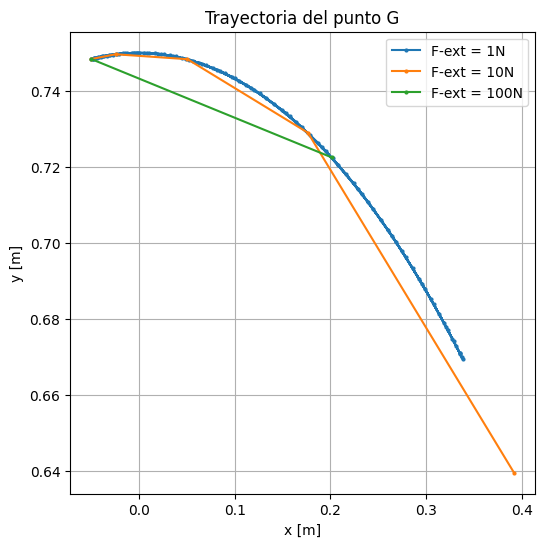

In [161]:
#Graficar
plt.figure(figsize=(6,6))
plt.plot(dicti[1][0], dicti[1][1], '-o', markersize=2, label='F-ext = 1N')
plt.plot(dicti[10][0], dicti[10][1], '-o', markersize=2, label='F-ext = 10N')
plt.plot(dicti[100][0], dicti[100][1], '-o', markersize=2, label='F-ext = 100N')

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Trayectoria del punto G')
plt.grid(True)
plt.legend()
plt.show()

s'' (s, s', Fext) =
                                                          ____________         ↪
        4            2  2              4         2       ╱  2    2             ↪
6⋅Fext⋅L  - 12⋅Fext⋅L ⋅s (t) + 6⋅Fext⋅s (t) + 3⋅L ⋅g⋅m⋅╲╱  L  - s (t) ⋅s(t) -  ↪
                                                                               ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                           2   ⎛ 2    2   ⎞    ↪
                                                        2⋅L ⋅m⋅⎝L  - s (t)⎠    ↪

↪                       2            ____________      
↪    2        ⎛d       ⎞            ╱  2    2      3   
↪ 2⋅L ⋅m⋅s(t)⋅⎜──(s(t))⎟  - 3⋅g⋅m⋅╲╱  L  - s (t) ⋅s (t)
↪             ⎝dt      ⎠                               
↪ ─────────────────────────────────────────────────────
↪                                                      
↪                                                      

N_A(s, s', Fext) =


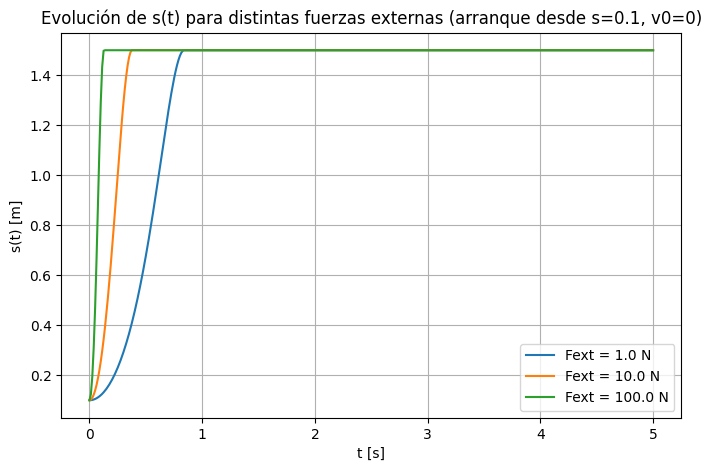

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols

# ----------------------------
# 1) Definiciones simbólicas
# ----------------------------
t = sp.symbols('t')                       # tiempo simbólico
s = dynamicsymbols('s')                   # s(t): posición horizontal de B (dinámica)
sd = sp.diff(s, t)
sdd = sp.diff(s, (t, 2))

L, m, g, Fext_sym = sp.symbols('L m g Fext', positive=True, real=True)

# marco inercial
N = ReferenceFrame('N')

# ----------------------------
# 2) Geometría: posiciones vectoriales (vectores en el marco N)
# ----------------------------
# altura de A por la restricción geométrica L^2 = s^2 + yA^2
yA = sp.sqrt(L**2 - s**2)

# posición de A y B (vectores en N)
rA = 0 * N.x + yA * N.y   # A: x=0, y=yA
rB = s * N.x + 0 * N.y    # B: x=s, y=0

# vector de A a B y posición del centro de masa (punto medio)
rAB = rB - rA
rG = (rA + rB) / 2        # vector posición del CM (desde origen del marco N)

# ----------------------------
# 3) Cinemática: velocidad y aceleración del CM (derivadas en N)
# ----------------------------
vG = rG.diff(t, N)        # velocidad del CM (vector)
aG = vG.diff(t, N)        # aceleración del CM (vector)

# ----------------------------
# 4) Rotacional: ángulo, omega, alpha
# ----------------------------
# ángulo instantáneo de la barra respecto al eje x del marco N
theta = sp.asin(s / L)            # θ(s)
omega = sp.diff(theta, t)         # ω = dθ/dt
alpha = sp.diff(theta, (t, 2))    # α = d²θ/dt²

# inercia de la barra respecto al CM (eje perpendicular al plano)
I_G = sp.Rational(1, 12) * m * L**2

# ----------------------------
# 5) Fuerzas (vectores) y restricciones
#    - A desliza verticalmente → reacción en A es horizontal (N_A * N.x)
#    - B desliza horizontalmente → reacción en B es vertical (N_B * N.y)
# ----------------------------
N_A, N_B = sp.symbols('N_A N_B', real=True)
F_A = N_A * N.x         # reacción en A (horizontal)
F_B = N_B * N.y         # reacción en B (vertical)
W   = -m * g * N.y      # peso actuando en -y
F_ext_vec = Fext_sym * N.x  # fuerza externa aplicada en B hacia +x

# ----------------------------
# 6) Newton-Euler: sum F = m a_G ; sum M_G = I_G * alpha (z comp)
# ----------------------------
sumF = F_A + F_B + W + F_ext_vec                       # ∑F (vector)
# momentos respecto al CM: r_i (aplicación) - rG
rA_G = rA - rG
rB_G = rB - rG

sumM = rA_G.cross(F_A) + rB_G.cross(F_B + F_ext_vec)   # ∑(r × F) sobre el cuerpo

# proyectamos ecuaciones en componentes escalares
eq_fx = sp.Eq(sumF.dot(N.x), m * aG.dot(N.x))
eq_fy = sp.Eq(sumF.dot(N.y), m * aG.dot(N.y))
eq_mz = sp.Eq(sumM.dot(N.z), I_G * alpha)

# ----------------------------
# 7) Resolver simbólicamente para N_A, N_B y s'' (sdd)
#    Notar: las ecuaciones contienen s, s_dot, s_ddot y Fext_sym (constante)
# ----------------------------
sols = sp.solve([eq_fx, eq_fy, eq_mz], [N_A, N_B, sp.diff(s, (t, 2))], dict=True)

if len(sols) == 0:
    raise RuntimeError("No se encontró solución simbólica: revisa las ecuaciones o el dominio de s.")

sol = sols[0]
sdd_expr = sp.simplify(sol[sp.diff(s, (t, 2))])   # expresión simbólica para s''
N_A_expr = sp.simplify(sol[N_A])
N_B_expr = sp.simplify(sol[N_B])

# Mostrar expresiones (opcional)
print("s'' (s, s', Fext) =")
sp.pprint(sdd_expr)
print("\nN_A(s, s', Fext) ="); sp.pprint(N_A_expr)
print("\nN_B(s, s', Fext) ="); sp.pprint(N_B_expr)

# ----------------------------
# 8) Preparar función numérica para integrar
# ----------------------------
# Sustituimos parámetros numéricos: L=1.5, m=1, g=9.81
param_values = {L: 1.5, m: 1.0, g: 9.81}
sdd_numeric = sp.lambdify((s, sp.diff(s, t), Fext_sym),
                           sdd_expr.subs(param_values),
                           'numpy')

# función de ecuación de movimiento para solve_ivp
def eom(t_num, y, Fext_val):
    s_val, sd_val = y
    # precaución: evitar domain error si s_val >= L
    if abs(s_val) >= 1.5:
        return [sd_val, 0.0]
    acc = float(sdd_numeric(s_val, sd_val, Fext_val))
    return [sd_val, acc]

# ----------------------------
# 9) Integración numérica y graficación para Fext = 1,10,100
# ----------------------------
t_span = (0.0, 5.0)
t_eval = np.linspace(t_span[0], t_span[1], 400)
y0 = [0.1, 0.0]   # arranca del reposo en s=0.1

F_values = [1.0, 10.0, 100.0]
plt.figure(figsize=(8,5))
for Fval in F_values:
    sol_ivp = solve_ivp(eom, t_span, y0, t_eval=t_eval, args=(Fval,), rtol=1e-7, atol=1e-9)
    plt.plot(sol_ivp.t, sol_ivp.y[0], label=f'Fext = {Fval} N')
    

plt.xlabel('t [s]')
plt.ylabel('s(t) [m]')
plt.title('Evolución de s(t) para distintas fuerzas externas (arranque desde s=0.1, v0=0)')
plt.grid(True)
plt.legend()
plt.show()


Análisis. Observamos que a mayor fuerza externa, mayor es la velocidad con que la distancia S aumenta. Llegando apropiadamente un punto donde S es máxima, cuando s es igual al de la barra. Este resultado es coherente, en la medida que, como la barra es un sólido no deformable, sin importar la fuerza, la longitud S sólo puede ser, como máximo, igual al de la barra.

A partir de estos resultados, es fácil calcular la posición del centro de masa de la barra, ya que esta es: 
rCM​=L/2​(cosθi^+sinθj^​)

Y theta es conocido, debido a que es θ=arcsin(s/L), y los valores de s ya los obtuvimos en la gráfica anterior.

PUNTO 4

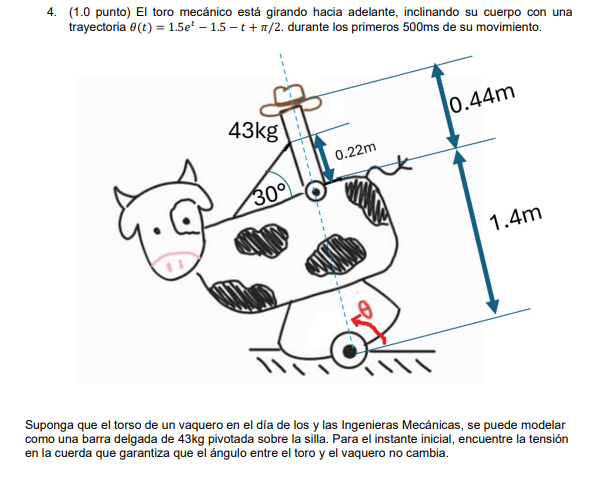

In [9]:
import sympy as sp

# ====== Símbolos ======
t = sp.symbols('t', real=True)
m, g, L, r_t, ang_tension = sp.symbols('m g L r_t ang_tension', positive=True)
theta = 1.5*sp.exp(-t) - 1.5 - t + sp.pi/2   # theta(t)
omega = sp.diff(theta, t)
alpha = sp.diff(omega, t)

# ====== Evaluar en t=0 ======
alpha_0 = alpha.subs(t, 0)
omega_0 = omega.subs(t, 0)
theta_0 = theta.subs(t, 0)

# ====== Marcos de referencia ======
N = ReferenceFrame('N')
B = N.orientnew('B', 'Axis', (theta_0, N.z))

# ====== Posiciones ======
r_cm = (L/2)*B.x           # del pivote al centro de masa
r_tension = r_t*B.x        # del pivote al punto donde actúa T

# ====== Fuerzas ======
F_g = -m*g*N.y
T = sp.symbols('T')  # tensión desconocida
F_t = -T*(sp.cos(ang_tension)*B.x + sp.sin(ang_tension)*B.y)  # dirección contraria a la cuerda

# ====== Momentos respecto al pivote ======
M_g = r_cm.cross(F_g)
M_t = r_tension.cross(F_t)

# ====== Dinámica rotacional: ΣM = I * α ======
I_p = (1/3)*m*L**2   # inercia de barra pivotada en un extremo
eq_mom = sp.Eq((M_g + M_t).dot(N.z), I_p*alpha_0)

# ====== Resolver para T ======
T_sol = sp.solve(eq_mom, T)[0]
T_sol_simplified = sp.simplify(T_sol)
print("Expresión simbólica de la tensión:")
display(T_sol_simplified)

# ====== Sustitución numérica ======
params = {
    m: 43,
    g: 9.81,
    L: 1.4,
    r_t: 0.22,
    ang_tension: sp.rad(30)
}
T_num = float(T_sol_simplified.subs(params))
print(f"\nTensión requerida al instante inicial: {T_num:.2f} N")


Expresión simbólica de la tensión:


          2       
    -0.5⋅L ⋅m     
──────────────────
rₜ⋅sin(angₜₑₙₛᵢₒₙ)


Tensión requerida al instante inicial: -383.09 N


BONO DE ESTE ITEM 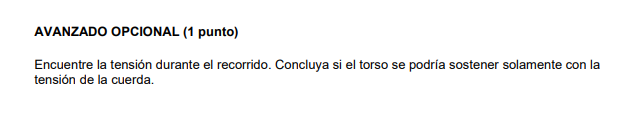

Expresión simbólica de T(t):
         ⎛       t    ⎛⎛           t      ⎞  -t⎞⎞  -t 
-0.5⋅L⋅m⋅⎝L + g⋅ℯ ⋅sin⎝⎝(t + 1.5)⋅ℯ  - 1.5⎠⋅ℯ  ⎠⎠⋅ℯ   
──────────────────────────────────────────────────────
                     rₜ⋅sin(ang)                      


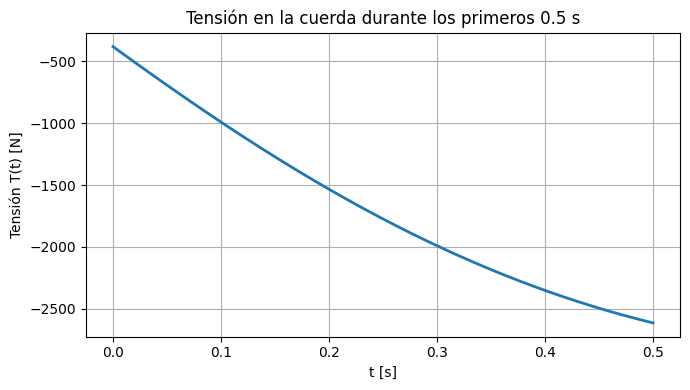

t=0.00 s -> T = -383.09 N
t=0.10 s -> T = -991.87 N
t=0.20 s -> T = -1533.92 N
t=0.50 s -> T = -2612.65 N


In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import ReferenceFrame

# -------------------------
# 1) Símbolos y funciones
# -------------------------
t = sp.symbols('t', real=True)

# parámetros físicos
m, g = sp.symbols('m g', positive=True)
L, r_t = sp.symbols('L r_t', positive=True)         # L: longitud barra, r_t: distancia cuerda-pivote
ang = sp.symbols('ang', real=True)                  # ángulo entre barra y cuerda (radianes)
T = sp.symbols('T', real=True)                      # tensión desconocida (funcionalmente T(t))

# definición de theta(t) dada en el enunciado
theta = 1.5*sp.exp(-t) - 1.5 - t + sp.pi/2
omega = sp.diff(theta, t)
alpha = sp.diff(omega, t)

# -------------------------
# 2) Marcos y vectores
# -------------------------
N = ReferenceFrame('N')
# marco de la barra orientado por theta(t) respecto a N
B = N.orientnew('B', 'Axis', (theta, N.z))

# vectores posiciones (desde el pivote)
r_cm = (L/2) * B.x        # vector del pivote al centro de masa
r_tension = r_t * B.x     # vector del pivote al punto donde actúa la cuerda

# fuerzas
F_g = -m * g * N.y        # peso (vector en marco N)
# tensión: la cuerda forma ang con la barra; la fuerza que aplica en la barra es -T * u
u_t = sp.cos(ang)*B.x + sp.sin(ang)*B.y   # vector unitario en dirección de la cuerda (relativo a la barra)
F_t = -T * u_t                            # fuerza que ejerce la cuerda sobre la barra

# -------------------------
# 3) Momentos y ecuación rotacional
# -------------------------
# momento del peso respecto al pivote: r_cm x F_g
M_g = r_cm.cross(F_g)

# momento de la tensión respecto al pivote: r_tension x F_t
M_t = r_tension.cross(F_t)

# inercia de una barra delgada pivotada en un extremo (eje perpendicular al plano)
I_p = sp.Rational(1,3) * m * L**2

# ecuación escalar de momentos (componente z)
eq_m = sp.Eq((M_g + M_t).dot(N.z), I_p * alpha)

# -------------------------
# 4) Resolver simbólicamente para T(t)
# -------------------------
T_expr = sp.solve(eq_m, T)[0]
T_expr = sp.simplify(T_expr)

# Mostrar la expresión simbólica (opcional)
print("Expresión simbólica de T(t):")
sp.pprint(T_expr)

# -------------------------
# 5) Parámetros numéricos y lambdify
# -------------------------
params = {
    m: 43.0,         # kg
    g: 9.81,         # m/s^2
    L: 1.4,          # m
    r_t: 0.22,       # m (distancia cuerda-pivote)
    ang: sp.pi/6     # 30 grados en radianes
}

# expresión numérica para T(t)
T_time_expr = sp.simplify(T_expr.subs(params))

# lambdify para evaluar rápidamente en numpy
T_func = sp.lambdify(t, T_time_expr, 'numpy')

# -------------------------
# 6) Evaluación numérica y gráfica en [0, 0.5] s
# -------------------------
t_vals = np.linspace(0.0, 0.5, 400)
T_vals = T_func(t_vals)

plt.figure(figsize=(7,4))
plt.plot(t_vals, T_vals, linewidth=2)
plt.xlabel('t [s]')
plt.ylabel('Tensión T(t) [N]')
plt.title('Tensión en la cuerda durante los primeros 0.5 s')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------
# 7) Valores de ejemplo: imprimir algunos puntos
# -------------------------
for ti in [0.0, 0.1, 0.2, 0.5]:
    print(f"t={ti:.2f} s -> T = {float(T_func(ti)):.2f} N")


No. La tensión de la cuerda no sirve. No es suficiente. Pongamos de cuenta que la aceleración es muy significativa, de hecho, crece de forma exponencial en función del tiempo. La tensión no crece tanto como la aceleración. Así, llegará un punto donde la aceleración sea tan grande que la tensión no será suficiente para sostener al vaquero.